# 1083 Albumin Initial ML

### By: Ian Weimer

In [1]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.7.0


## Imports

In [102]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import pydotplus
from imblearn.over_sampling import SMOTE, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [103]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases_3M.csv')

In [104]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [105]:
df.head()

personid                           encounterid  \
0  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
1  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
2  00b6ec34-7816-4301-8317-3590b4a948d7  387586e3-a77c-474d-bb69-d144a170fd05   
3  00ef14c9-c421-4d20-ba99-a1b5836336e5  31cb9b95-0455-4444-bb29-4d611d2349f8   
4  010c48a7-25f8-4508-b0ac-628e7418e524  ef3dddf7-6201-423b-8b72-4bc39da31b18   

  condition  albumin_24_hours  ICU  CCI  bl_albumin_value  \
0       D62                 1    1    2               4.0   
1       D64                 0    0    6               1.6   
2       D64                 0    0    1               1.6   
3       D72                 1    1    1               2.6   
4       D84                 0    0    4               2.2   

   albumin_lab_baseline_severity  qSOFA  hospital_free_days  beta_blocker  \
0                            0.0      1                   1             0   
1                            1.0      0                   2             1   
2                            1.0      0                   2             0   
3                            1.0      0                   1             1   
4                            1.0      0                   1             0   

   Cirrhosis_score  nutritional_anemia  SEWS  albumin  LOS_days  
0                0                   0     3        1         2  
1                0                   0     0        1         2  
2                0                   0     0        1         2  
3                0                   0     1        1         2  
4                0                   0     0        1         2

In [106]:
df.shape

(3413032, 16)

In [107]:
df.drop(columns=['personid', 'encounterid', 'condition', 'albumin', 'hospital_free_days'], inplace=True)

In [108]:
df.describe()

albumin_24_hours           ICU           CCI  bl_albumin_value  \
count      3.413032e+06  3.413032e+06  3.413032e+06      3.413032e+06   
mean       2.606861e-02  6.952997e-02  2.728158e+00      3.520915e+00   
std        1.593394e-01  2.543532e-01  2.589764e+00      7.575164e-01   
min        0.000000e+00  0.000000e+00  0.000000e+00      7.000000e-05   
25%        0.000000e+00  0.000000e+00  1.000000e+00      3.000000e+00   
50%        0.000000e+00  0.000000e+00  2.000000e+00      3.600000e+00   
75%        0.000000e+00  0.000000e+00  4.000000e+00      4.100000e+00   
max        1.000000e+00  1.000000e+00  2.300000e+01      2.000000e+01   

       albumin_lab_baseline_severity         qSOFA  beta_blocker  \
count                   3.413032e+06  3.413032e+06  3.413032e+06   
mean                    2.182265e-01  2.441996e-01  1.930574e-01   
std                     4.130421e-01  5.004336e-01  3.946977e-01   
min                     0.000000e+00  0.000000e+00  0.000000e+00   
25%                     0.000000e+00  0.000000e+00  0.000000e+00   
50%                     0.000000e+00  0.000000e+00  0.000000e+00   
75%                     0.000000e+00  0.000000e+00  0.000000e+00   
max                     1.000000e+00  3.000000e+00  1.000000e+00   

       Cirrhosis_score  nutritional_anemia          SEWS      LOS_days  
count     3.413032e+06        3.413032e+06  3.413032e+06  3.413032e+06  
mean      1.015889e-01        2.391237e-01  6.980216e-01  9.999643e-01  
std       3.021069e-01        4.265485e-01  1.283177e+00  8.164959e-01  
min       0.000000e+00        0.000000e+00  0.000000e+00  0.000000e+00  
25%       0.000000e+00        0.000000e+00  0.000000e+00  0.000000e+00  
50%       0.000000e+00        0.000000e+00  0.000000e+00  1.000000e+00  
75%       0.000000e+00        0.000000e+00  1.000000e+00  2.000000e+00  
max       1.000000e+00        1.000000e+00  1.700000e+01  2.000000e+00

In [109]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

## Modeling

In [110]:
# establish target feature, LOS_days, as y feature
y = df['LOS_days']
# drop target feature from features dataframe
X = df.drop(columns = ['LOS_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [111]:
cols

Index(['albumin_24_hours', 'ICU', 'CCI', 'bl_albumin_value',
       'albumin_lab_baseline_severity', 'qSOFA', 'beta_blocker',
       'Cirrhosis_score', 'nutritional_anemia', 'SEWS'],
      dtype='object')

## Standardize Data

In [112]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [113]:
X.head()

albumin_24_hours  ICU  CCI  bl_albumin_value  \
0                 1    1    2               4.0   
1                 0    0    6               1.6   
2                 0    0    1               1.6   
3                 1    1    1               2.6   
4                 0    0    4               2.2   

   albumin_lab_baseline_severity  qSOFA  beta_blocker  Cirrhosis_score  \
0                            0.0      1             0                0   
1                            1.0      0             1                0   
2                            1.0      0             0                0   
3                            1.0      0             1                0   
4                            1.0      0             0                0   

   nutritional_anemia  SEWS  
0                   0     3  
1                   0     0  
2                   0     0  
3                   0     1  
4                   0     0

In [114]:
X.shape

(3413032, 10)

## Train Test Split

In [115]:
#sm = SMOTENC(random_state=42, categorical_features = [0, 1, 2, 3, 4, 5, \
#                                                     6, 7, 8, 9, 10])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [116]:
#sm = SMOTEN(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [117]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

In [118]:
y_train.value_counts()

0    910464
1    910170
2    909791
Name: LOS_days, dtype: int64

## Multinomial Logistic Regression

In [119]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial')

Feature: albumin_24_hours Score: -1.13814
Feature: ICU Score: -1.69552
Feature: CCI Score: -0.04597
Feature: bl_albumin_value Score: 0.62091
Feature: albumin_lab_baseline_severity Score: 0.06740
Feature: qSOFA Score: -0.10300
Feature: beta_blocker Score: -1.29590
Feature: Cirrhosis_score Score: 0.07176
Feature: nutritional_anemia Score: 0.32907
Feature: SEWS Score: -0.36876


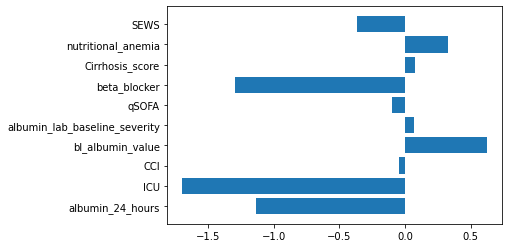

In [120]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                               Importance
bl_albumin_value                 1.860625
nutritional_anemia               1.389675
Cirrhosis_score                  1.074393
albumin_lab_baseline_severity    1.069725
CCI                              0.955066
qSOFA                            0.902129
SEWS                             0.691588
albumin_24_hours                 0.320415
beta_blocker                     0.273652
ICU                              0.183504


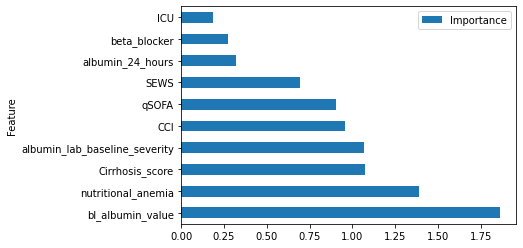

In [121]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [122]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [123]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[716531 116339  77594]
 [363223 244543 302404]
 [191503 191422 526866]]


In [124]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.56      0.79      0.66    910464
           1       0.44      0.27      0.33    910170
           2       0.58      0.58      0.58    909791

    accuracy                           0.54   2730425
   macro avg       0.53      0.54      0.52   2730425
weighted avg       0.53      0.54      0.52   2730425



In [125]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[179053  28900  19319]
 [ 91007  60832  75673]
 [ 47770  48006 132047]]


In [126]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.56      0.79      0.66    227272
           1       0.44      0.27      0.33    227512
           2       0.58      0.58      0.58    227823

    accuracy                           0.54    682607
   macro avg       0.53      0.54      0.52    682607
weighted avg       0.53      0.54      0.52    682607



## 1: Decision Tree (Max Depth=3)

In [135]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=3)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Feature: albumin_24_hours Score: 0.00000
Feature: ICU Score: 0.02427
Feature: CCI Score: 0.00000
Feature: bl_albumin_value Score: 0.44915
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.00000
Feature: beta_blocker Score: 0.28289
Feature: Cirrhosis_score Score: 0.00000
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.24369


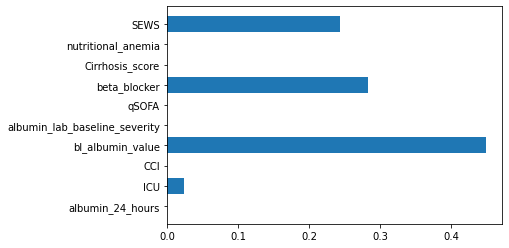

In [136]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [137]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [138]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[530877 316737  62850]
 [217247 410410 282513]
 [105461 350406 453924]]


In [139]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60    910464
           1       0.38      0.45      0.41    910170
           2       0.57      0.50      0.53    909791

    accuracy                           0.51   2730425
   macro avg       0.52      0.51      0.52   2730425
weighted avg       0.52      0.51      0.52   2730425



In [140]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[132549  79095  15628]
 [ 54851 102436  70225]
 [ 26178  88626 113019]]


In [141]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60    227272
           1       0.38      0.45      0.41    227512
           2       0.57      0.50      0.53    227823

    accuracy                           0.51    682607
   macro avg       0.52      0.51      0.51    682607
weighted avg       0.52      0.51      0.51    682607



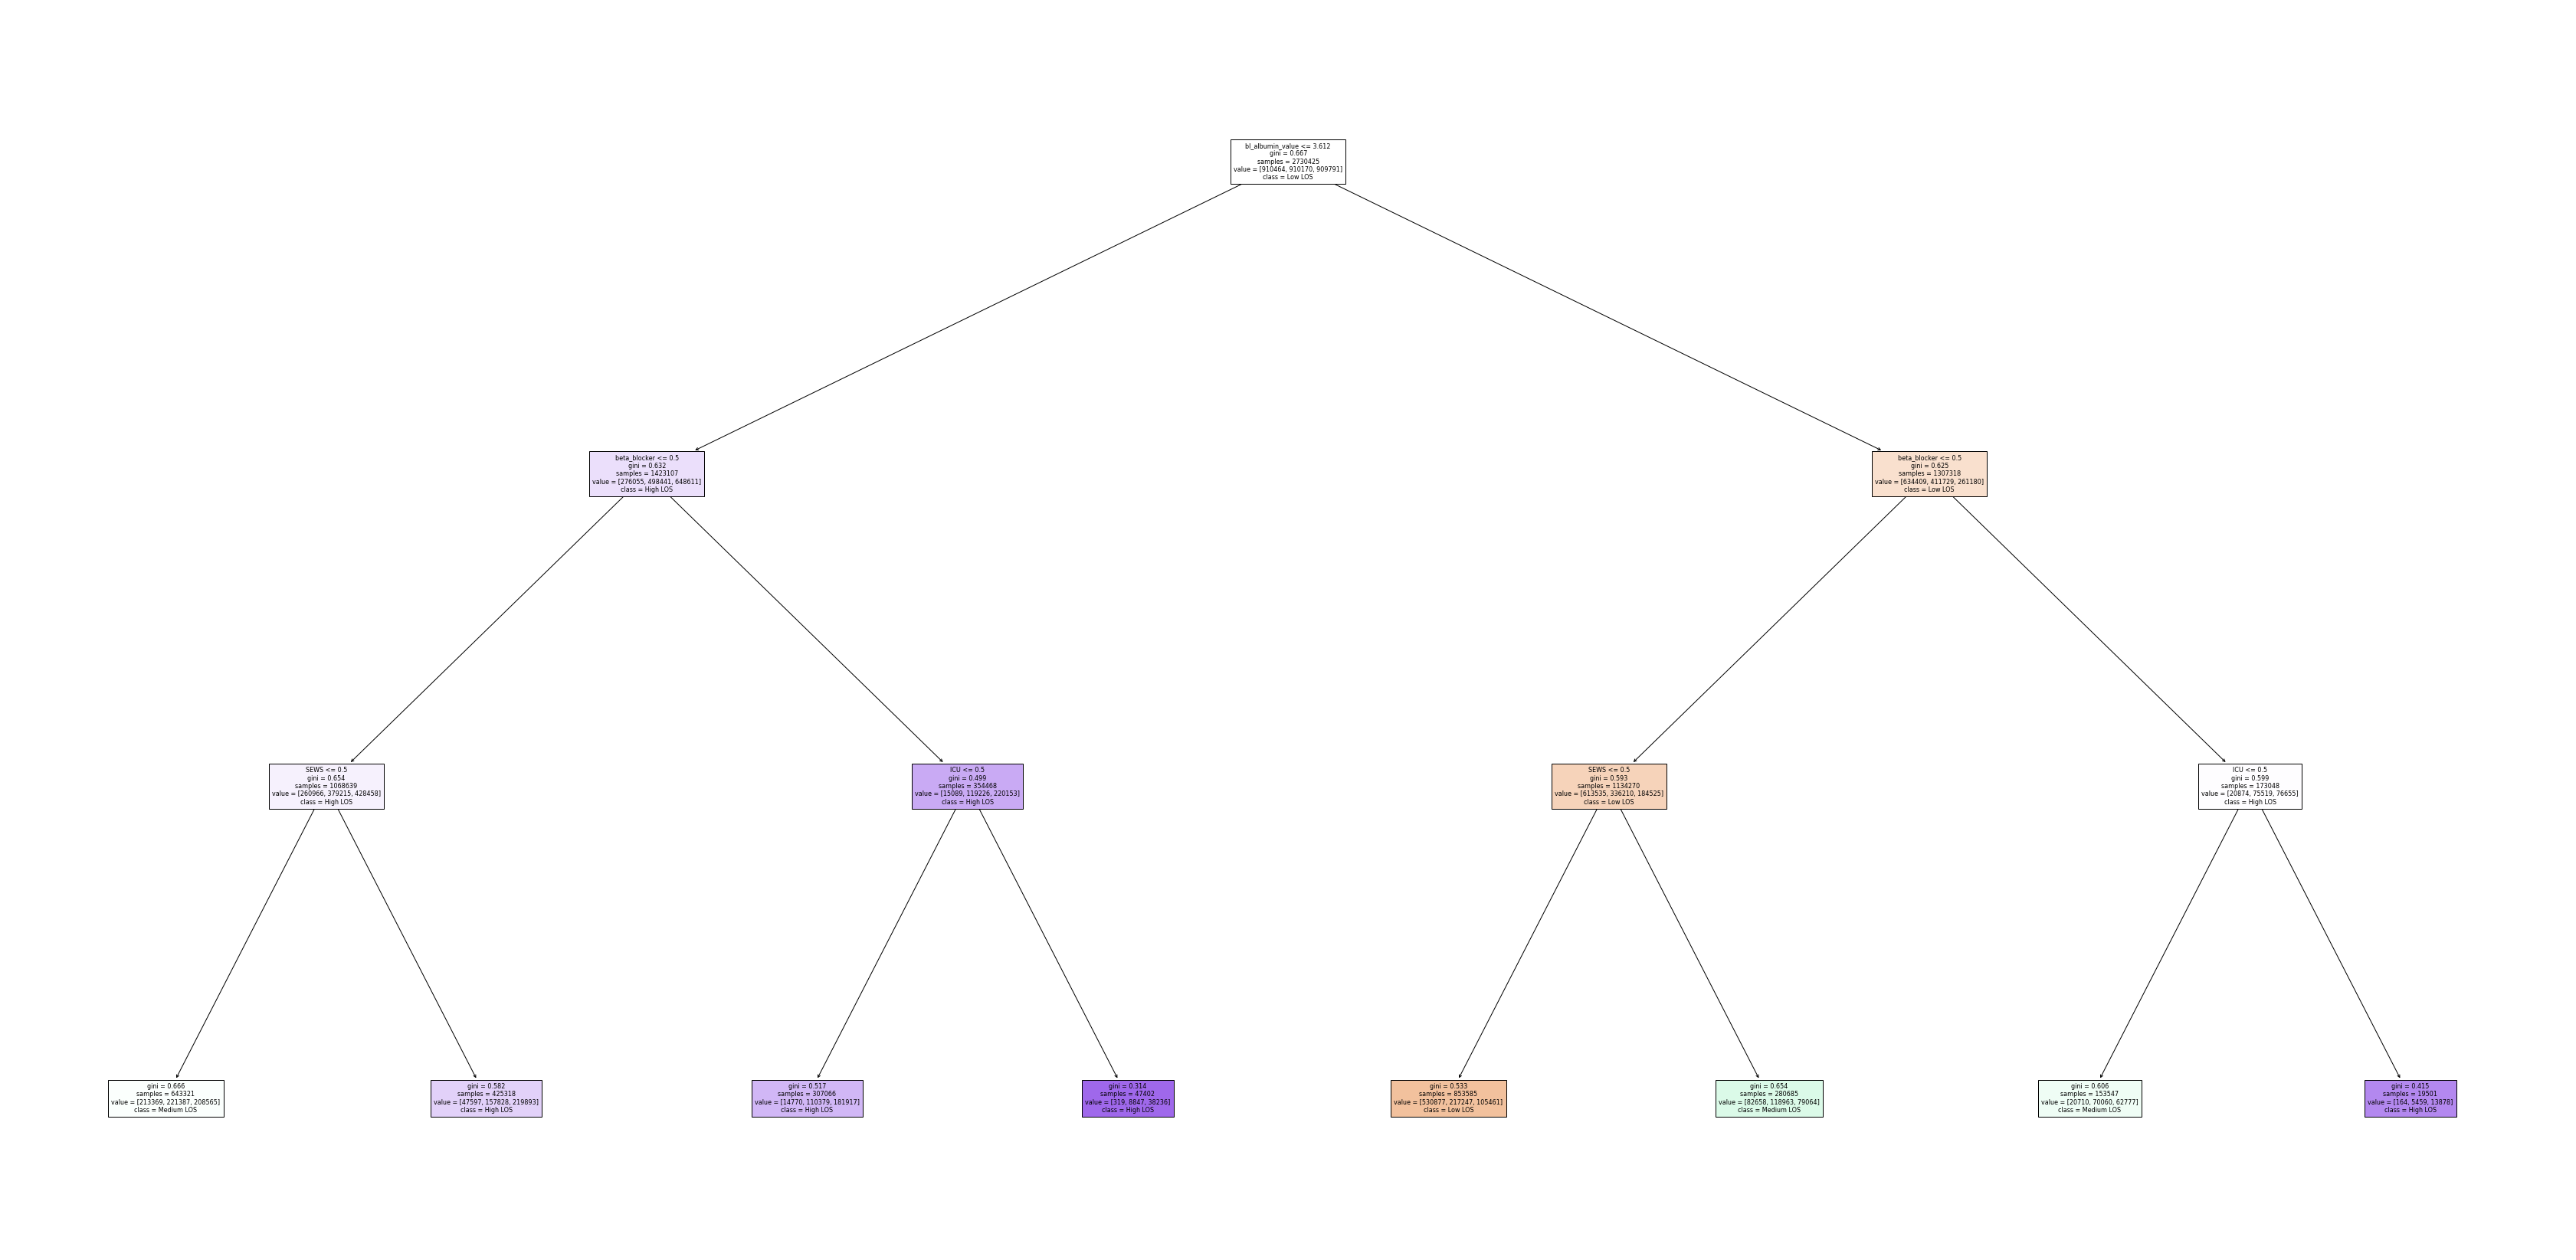

In [142]:
feature_names = X_train.columns.tolist()
class_names = ['Low LOS', 'Medium LOS', 'High LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [36]:
pwd

'/Users/ianweimer/Desktop/JupyterNotebooks/1083-albumin-data-exploration/ML/Blood_Diseases_Cohort'

In [42]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D3.png')

True

## 2: Decision Tree (Max Depth=4)

In [143]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: albumin_24_hours Score: 0.00023
Feature: ICU Score: 0.08503
Feature: CCI Score: 0.00000
Feature: bl_albumin_value Score: 0.44050
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.00000
Feature: beta_blocker Score: 0.25243
Feature: Cirrhosis_score Score: 0.00000
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.22180


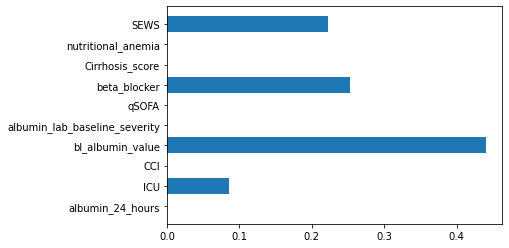

In [144]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [145]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [146]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[662725 100063 147676]
 [322718 156547 430905]
 [177528 102972 629291]]


In [147]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.57      0.73      0.64    910464
           1       0.44      0.17      0.25    910170
           2       0.52      0.69      0.59    909791

    accuracy                           0.53   2730425
   macro avg       0.51      0.53      0.49   2730425
weighted avg       0.51      0.53      0.49   2730425



In [148]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[165946  24728  36598]
 [ 81043  39135 107334]
 [ 44396  25863 157564]]


In [149]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.57      0.73      0.64    227272
           1       0.44      0.17      0.25    227512
           2       0.52      0.69      0.60    227823

    accuracy                           0.53    682607
   macro avg       0.51      0.53      0.49    682607
weighted avg       0.51      0.53      0.49    682607



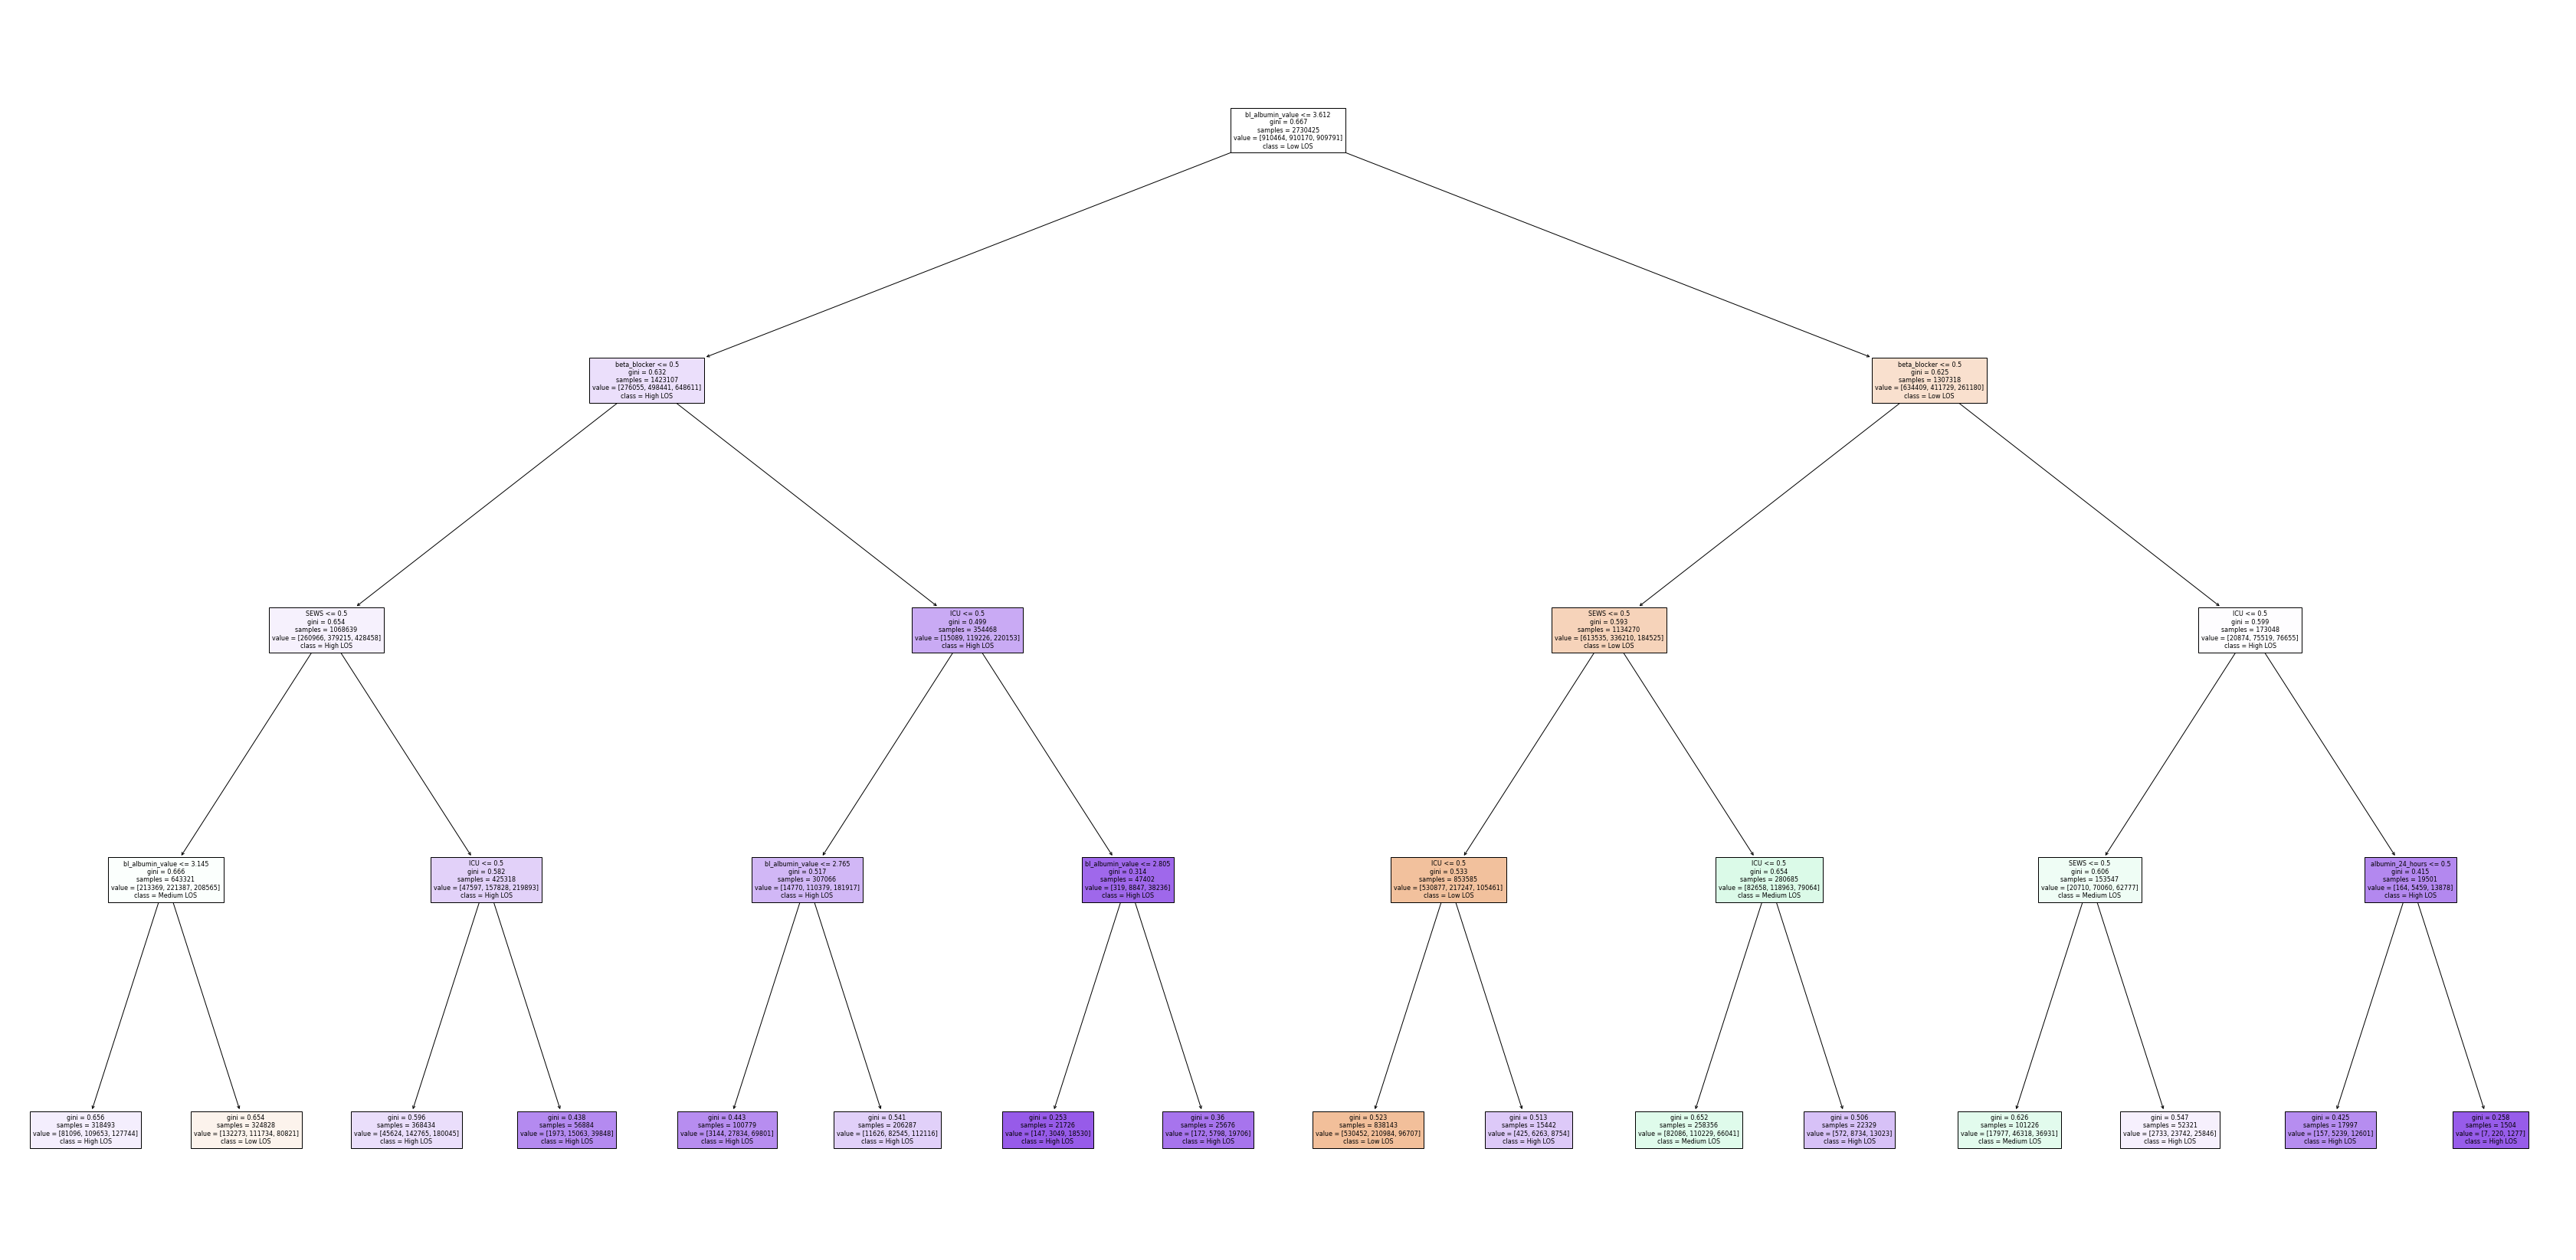

In [150]:
feature_names = X_train.columns.tolist()
class_names = ['Low LOS', 'Medium LOS', 'High LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [52]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D4.png')

True

## 3: Decision Tree 

In [151]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)

Feature: albumin_24_hours Score: 0.00068
Feature: ICU Score: 0.10240
Feature: CCI Score: 0.00136
Feature: bl_albumin_value Score: 0.42517
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.00259
Feature: beta_blocker Score: 0.23639
Feature: Cirrhosis_score Score: 0.00010
Feature: nutritional_anemia Score: 0.01257
Feature: SEWS Score: 0.21874


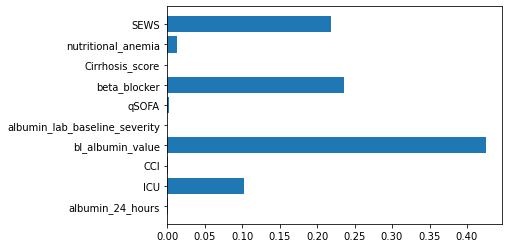

In [152]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [153]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [154]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[716742  75623 118099]
 [369995 192712 347463]
 [200241 159410 550140]]


In [155]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.56      0.79      0.65    910464
           1       0.45      0.21      0.29    910170
           2       0.54      0.60      0.57    909791

    accuracy                           0.53   2730425
   macro avg       0.52      0.53      0.50   2730425
weighted avg       0.52      0.53      0.50   2730425



In [156]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[179210  18906  29156]
 [ 92807  48000  86705]
 [ 49975  39981 137867]]


In [157]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.56      0.79      0.65    227272
           1       0.45      0.21      0.29    227512
           2       0.54      0.61      0.57    227823

    accuracy                           0.53    682607
   macro avg       0.52      0.53      0.50    682607
weighted avg       0.52      0.53      0.50    682607



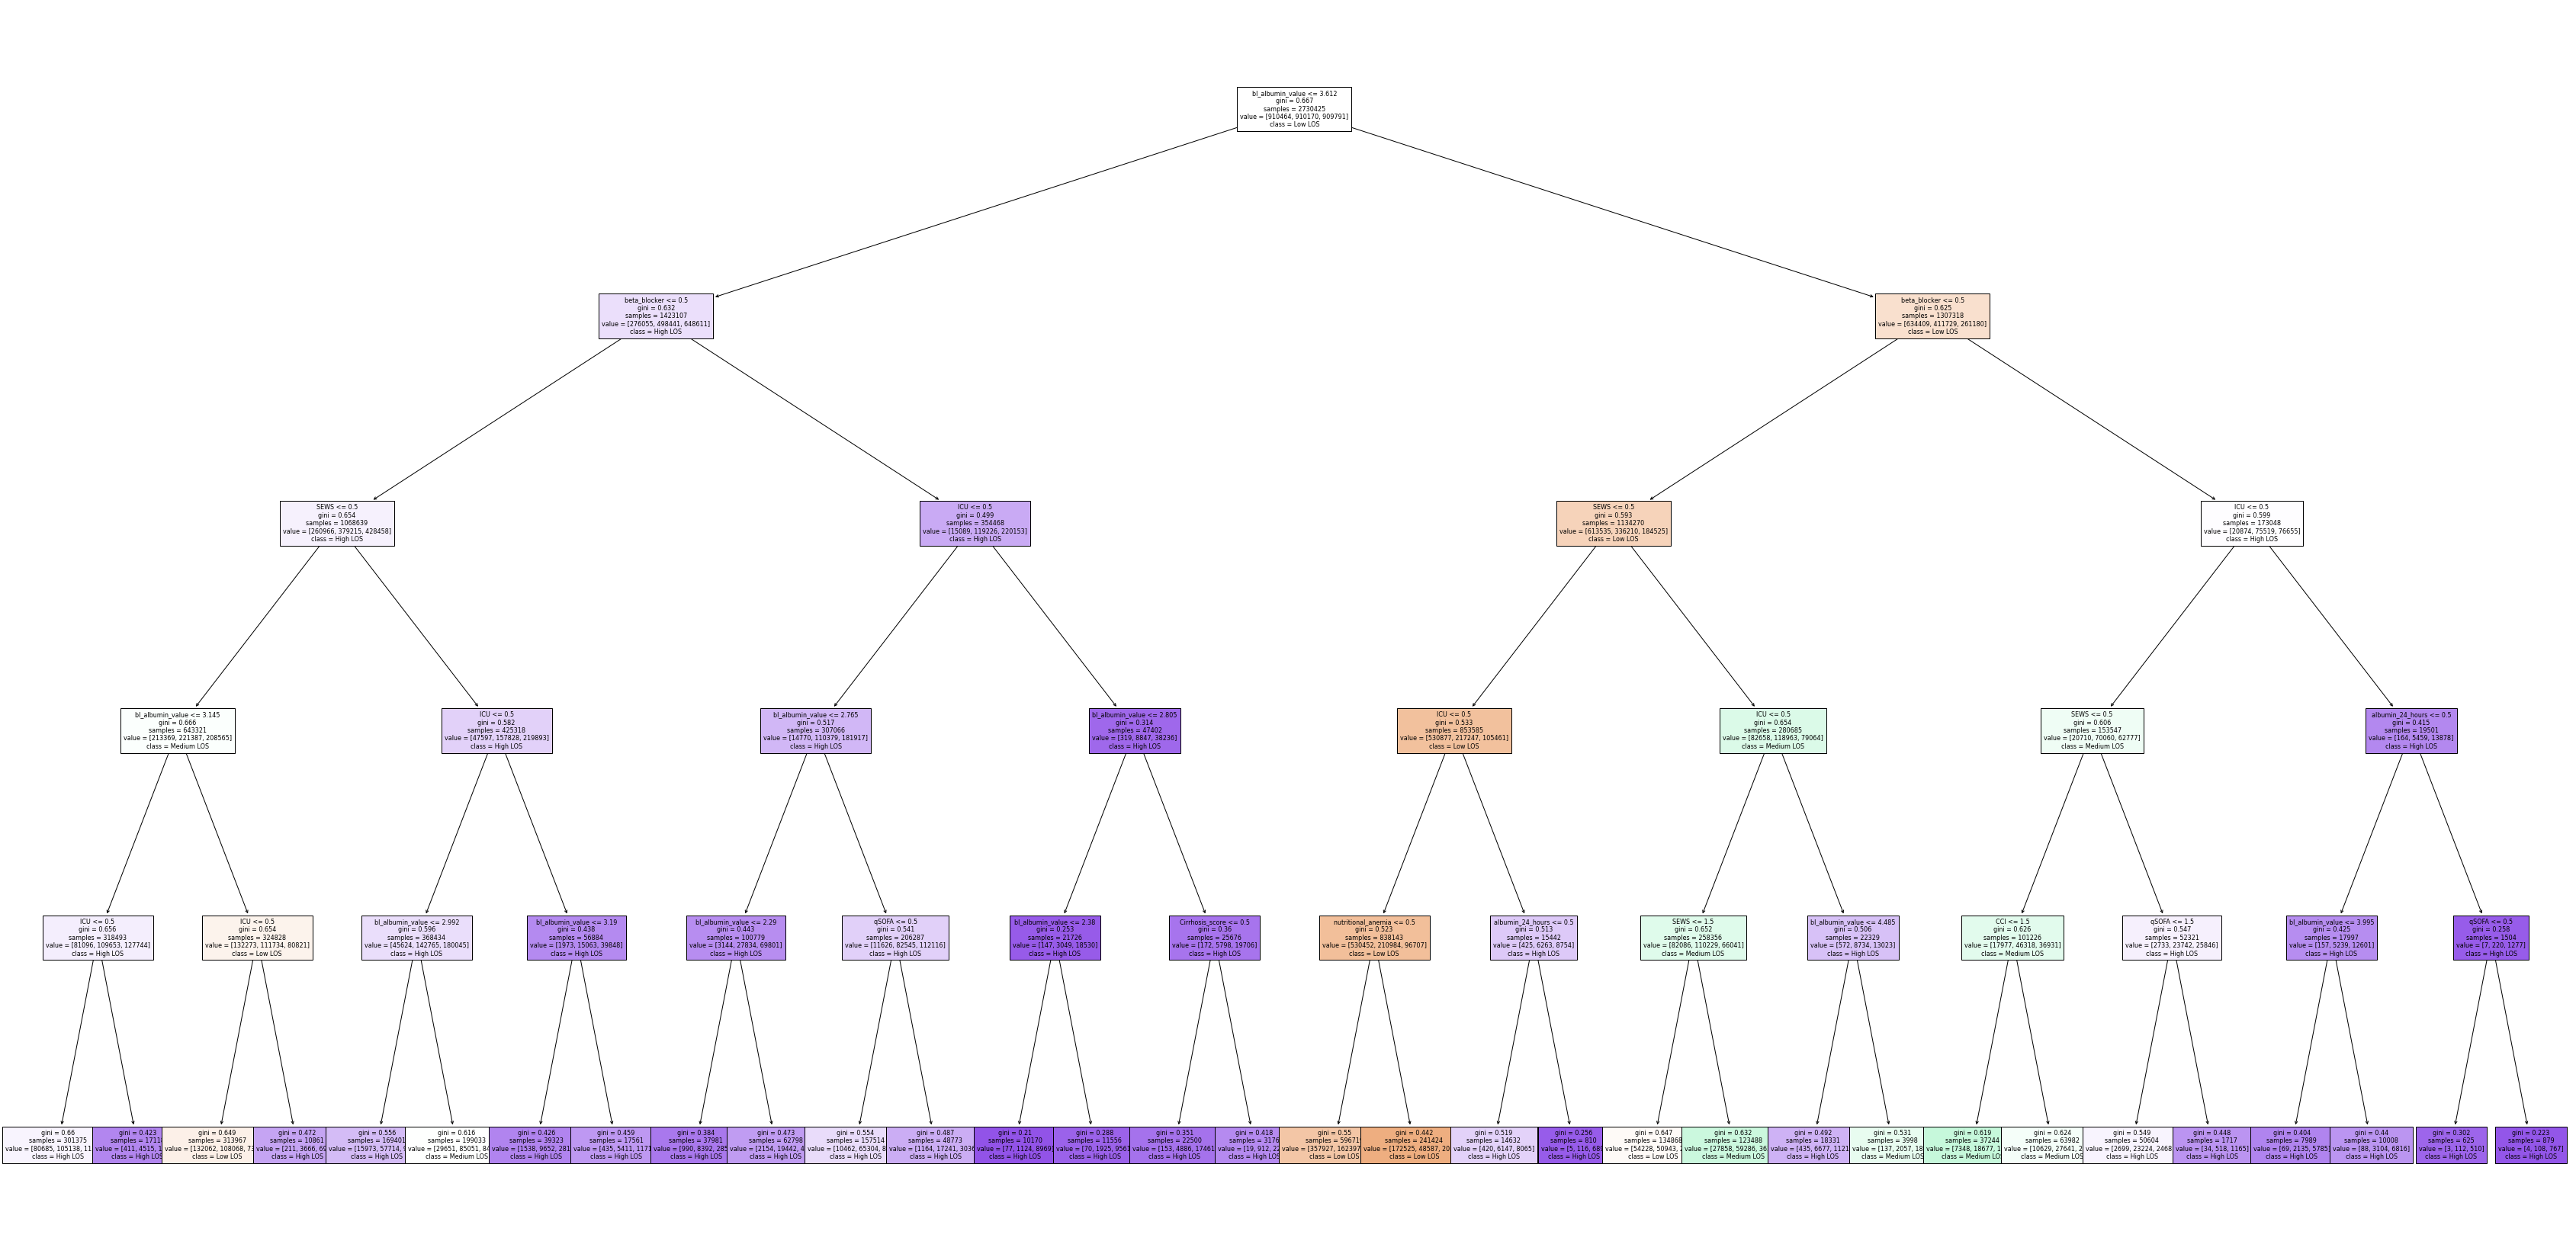

In [158]:
feature_names = X_train.columns.tolist()
class_names = ['Low LOS', 'Medium LOS', 'High LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [135]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D5_NCBL.png')

True

## 4: Decision Tree 

In [159]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

Feature: albumin_24_hours Score: 0.00101
Feature: ICU Score: 0.09851
Feature: CCI Score: 0.00730
Feature: bl_albumin_value Score: 0.42987
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.00305
Feature: beta_blocker Score: 0.22742
Feature: Cirrhosis_score Score: 0.00184
Feature: nutritional_anemia Score: 0.01777
Feature: SEWS Score: 0.21322


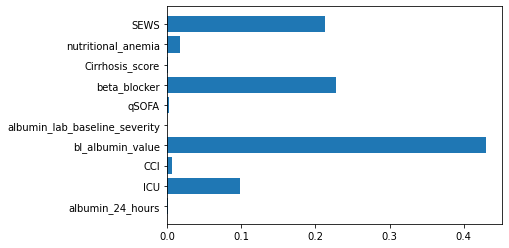

In [160]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [161]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [162]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[696806  94026 119632]
 [345302 188744 376124]
 [183397 136622 589772]]


In [163]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.57      0.77      0.65    910464
           1       0.45      0.21      0.28    910170
           2       0.54      0.65      0.59    909791

    accuracy                           0.54   2730425
   macro avg       0.52      0.54      0.51   2730425
weighted avg       0.52      0.54      0.51   2730425



In [164]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[174327  23281  29664]
 [ 86685  46940  93887]
 [ 45766  34360 147697]]


In [165]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.57      0.77      0.65    227272
           1       0.45      0.21      0.28    227512
           2       0.54      0.65      0.59    227823

    accuracy                           0.54    682607
   macro avg       0.52      0.54      0.51    682607
weighted avg       0.52      0.54      0.51    682607



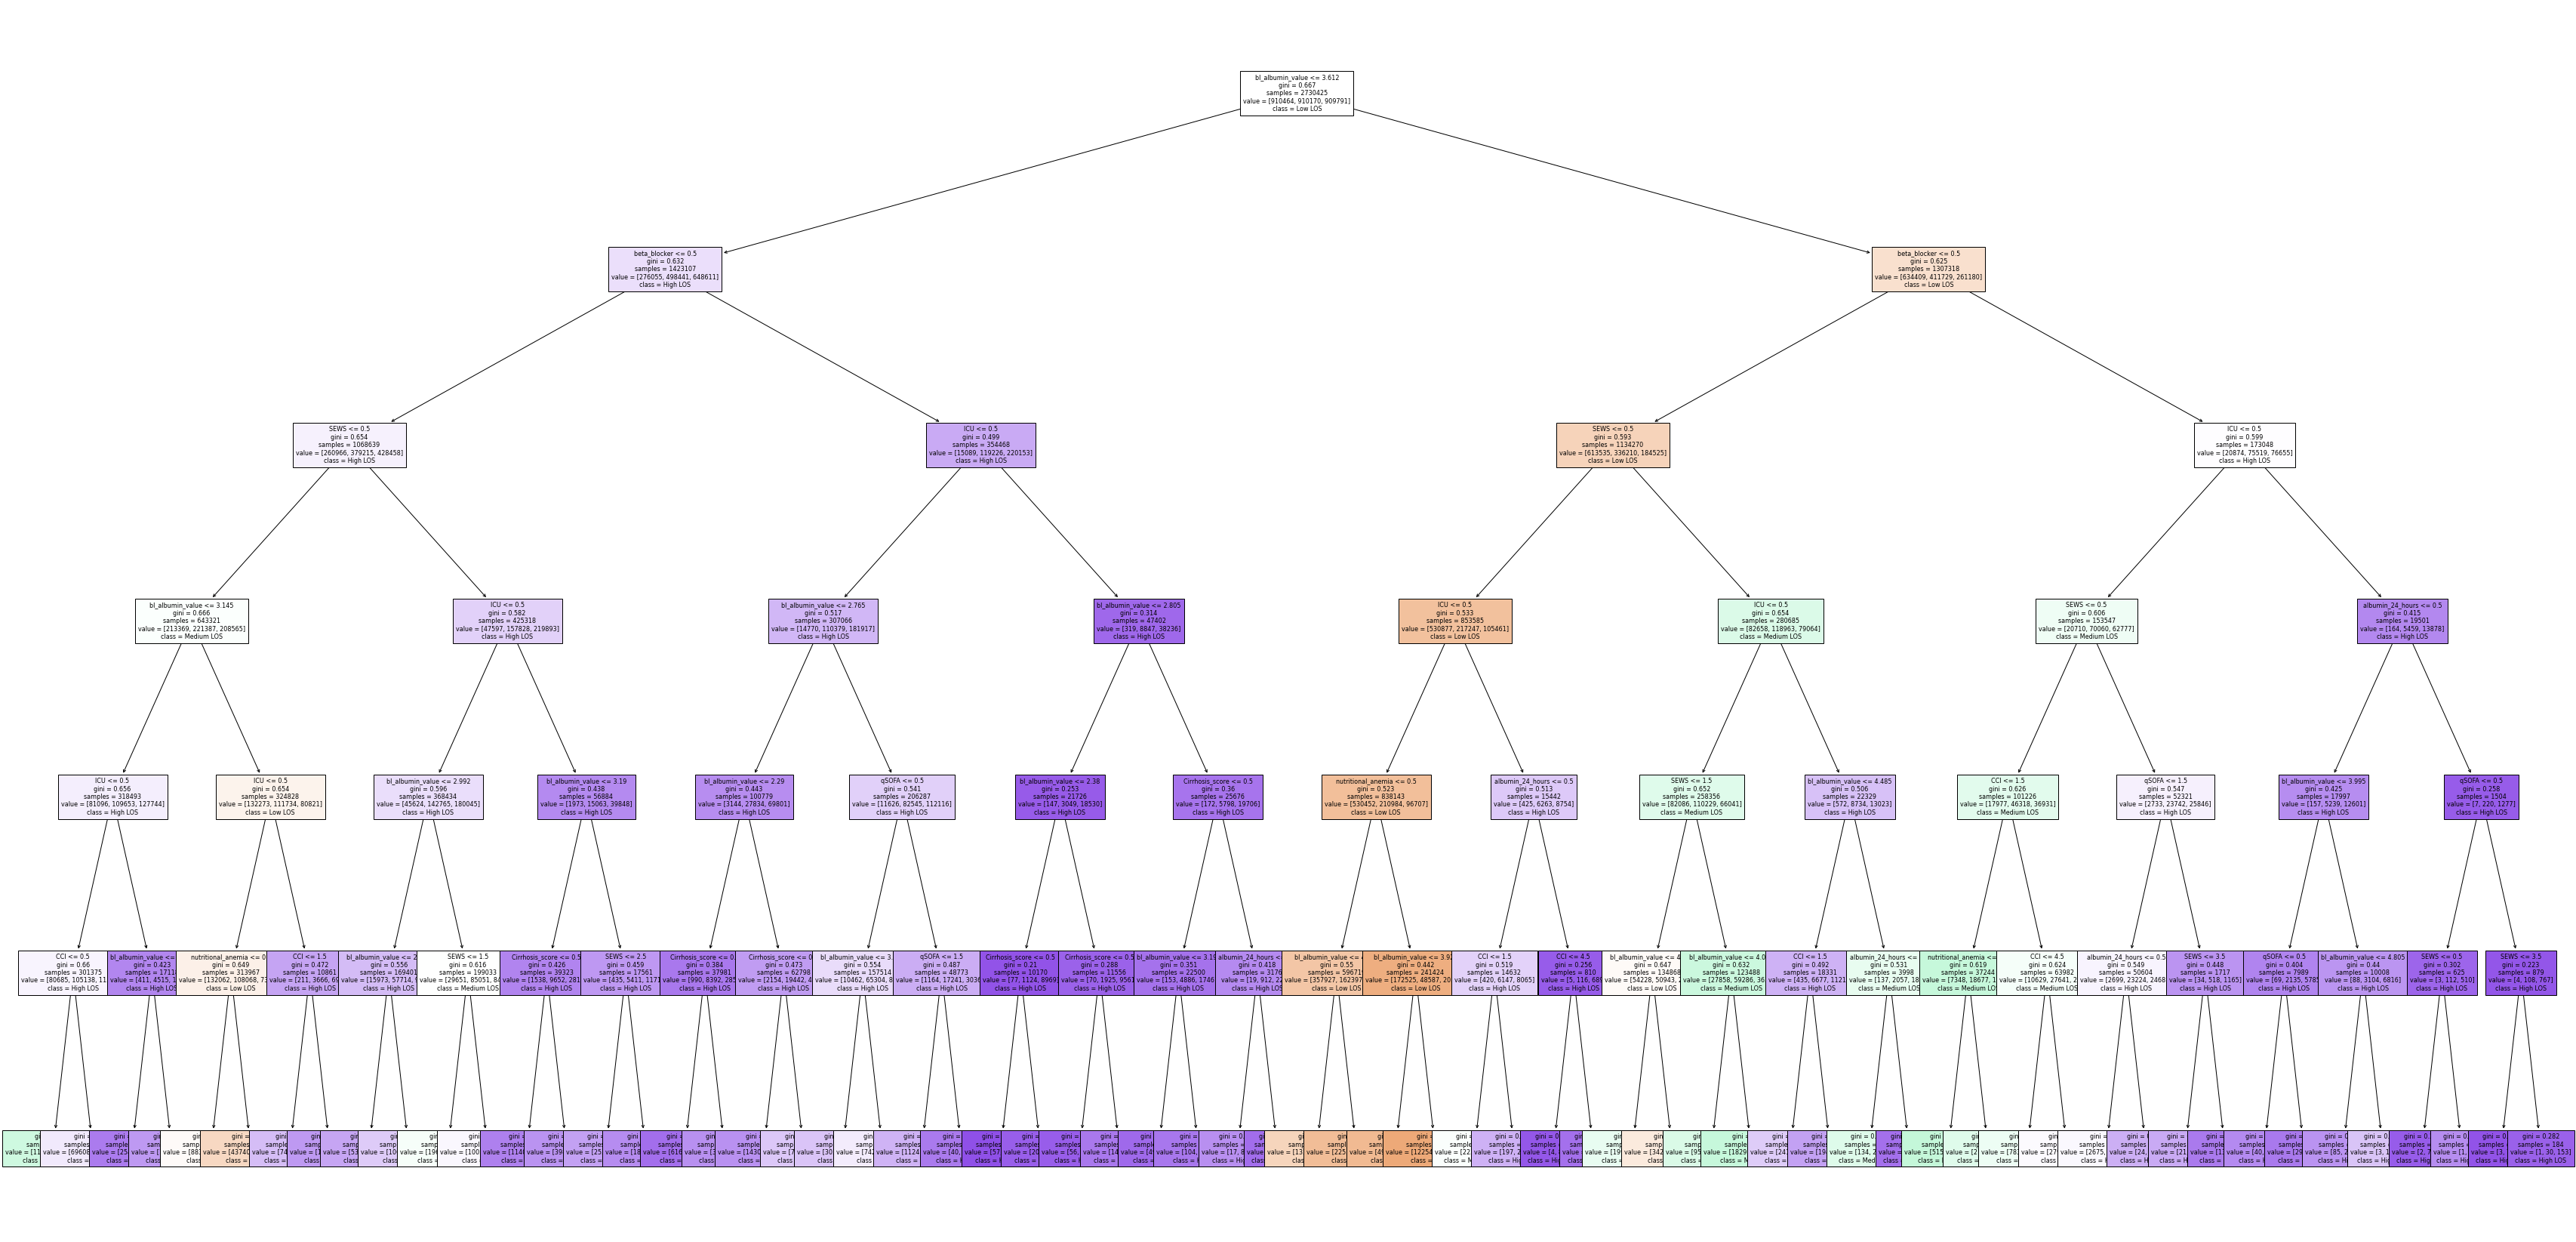

In [166]:
feature_names = X_train.columns.tolist()
class_names = ['Low LOS', 'Medium LOS', 'High LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [144]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D6_NCBL.png')

True

## 5: Decision Tree 

In [167]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

Feature: albumin_24_hours Score: 0.00130
Feature: ICU Score: 0.09593
Feature: CCI Score: 0.02068
Feature: bl_albumin_value Score: 0.42671
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.00438
Feature: beta_blocker Score: 0.22146
Feature: Cirrhosis_score Score: 0.00222
Feature: nutritional_anemia Score: 0.01866
Feature: SEWS Score: 0.20867


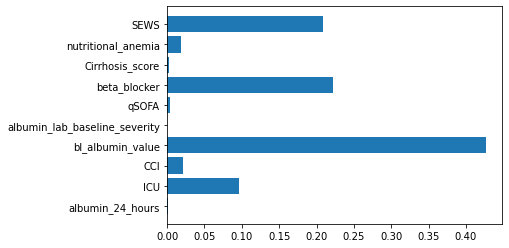

In [168]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [169]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [170]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[653358 134183 122923]
 [297345 250408 362417]
 [148309 178616 582866]]


In [171]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65    910464
           1       0.44      0.28      0.34    910170
           2       0.55      0.64      0.59    909791

    accuracy                           0.54   2730425
   macro avg       0.53      0.54      0.53   2730425
weighted avg       0.53      0.54      0.53   2730425



In [172]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[163450  33430  30392]
 [ 74727  62353  90432]
 [ 36808  45135 145880]]


In [173]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65    227272
           1       0.44      0.27      0.34    227512
           2       0.55      0.64      0.59    227823

    accuracy                           0.54    682607
   macro avg       0.53      0.54      0.53    682607
weighted avg       0.53      0.54      0.53    682607



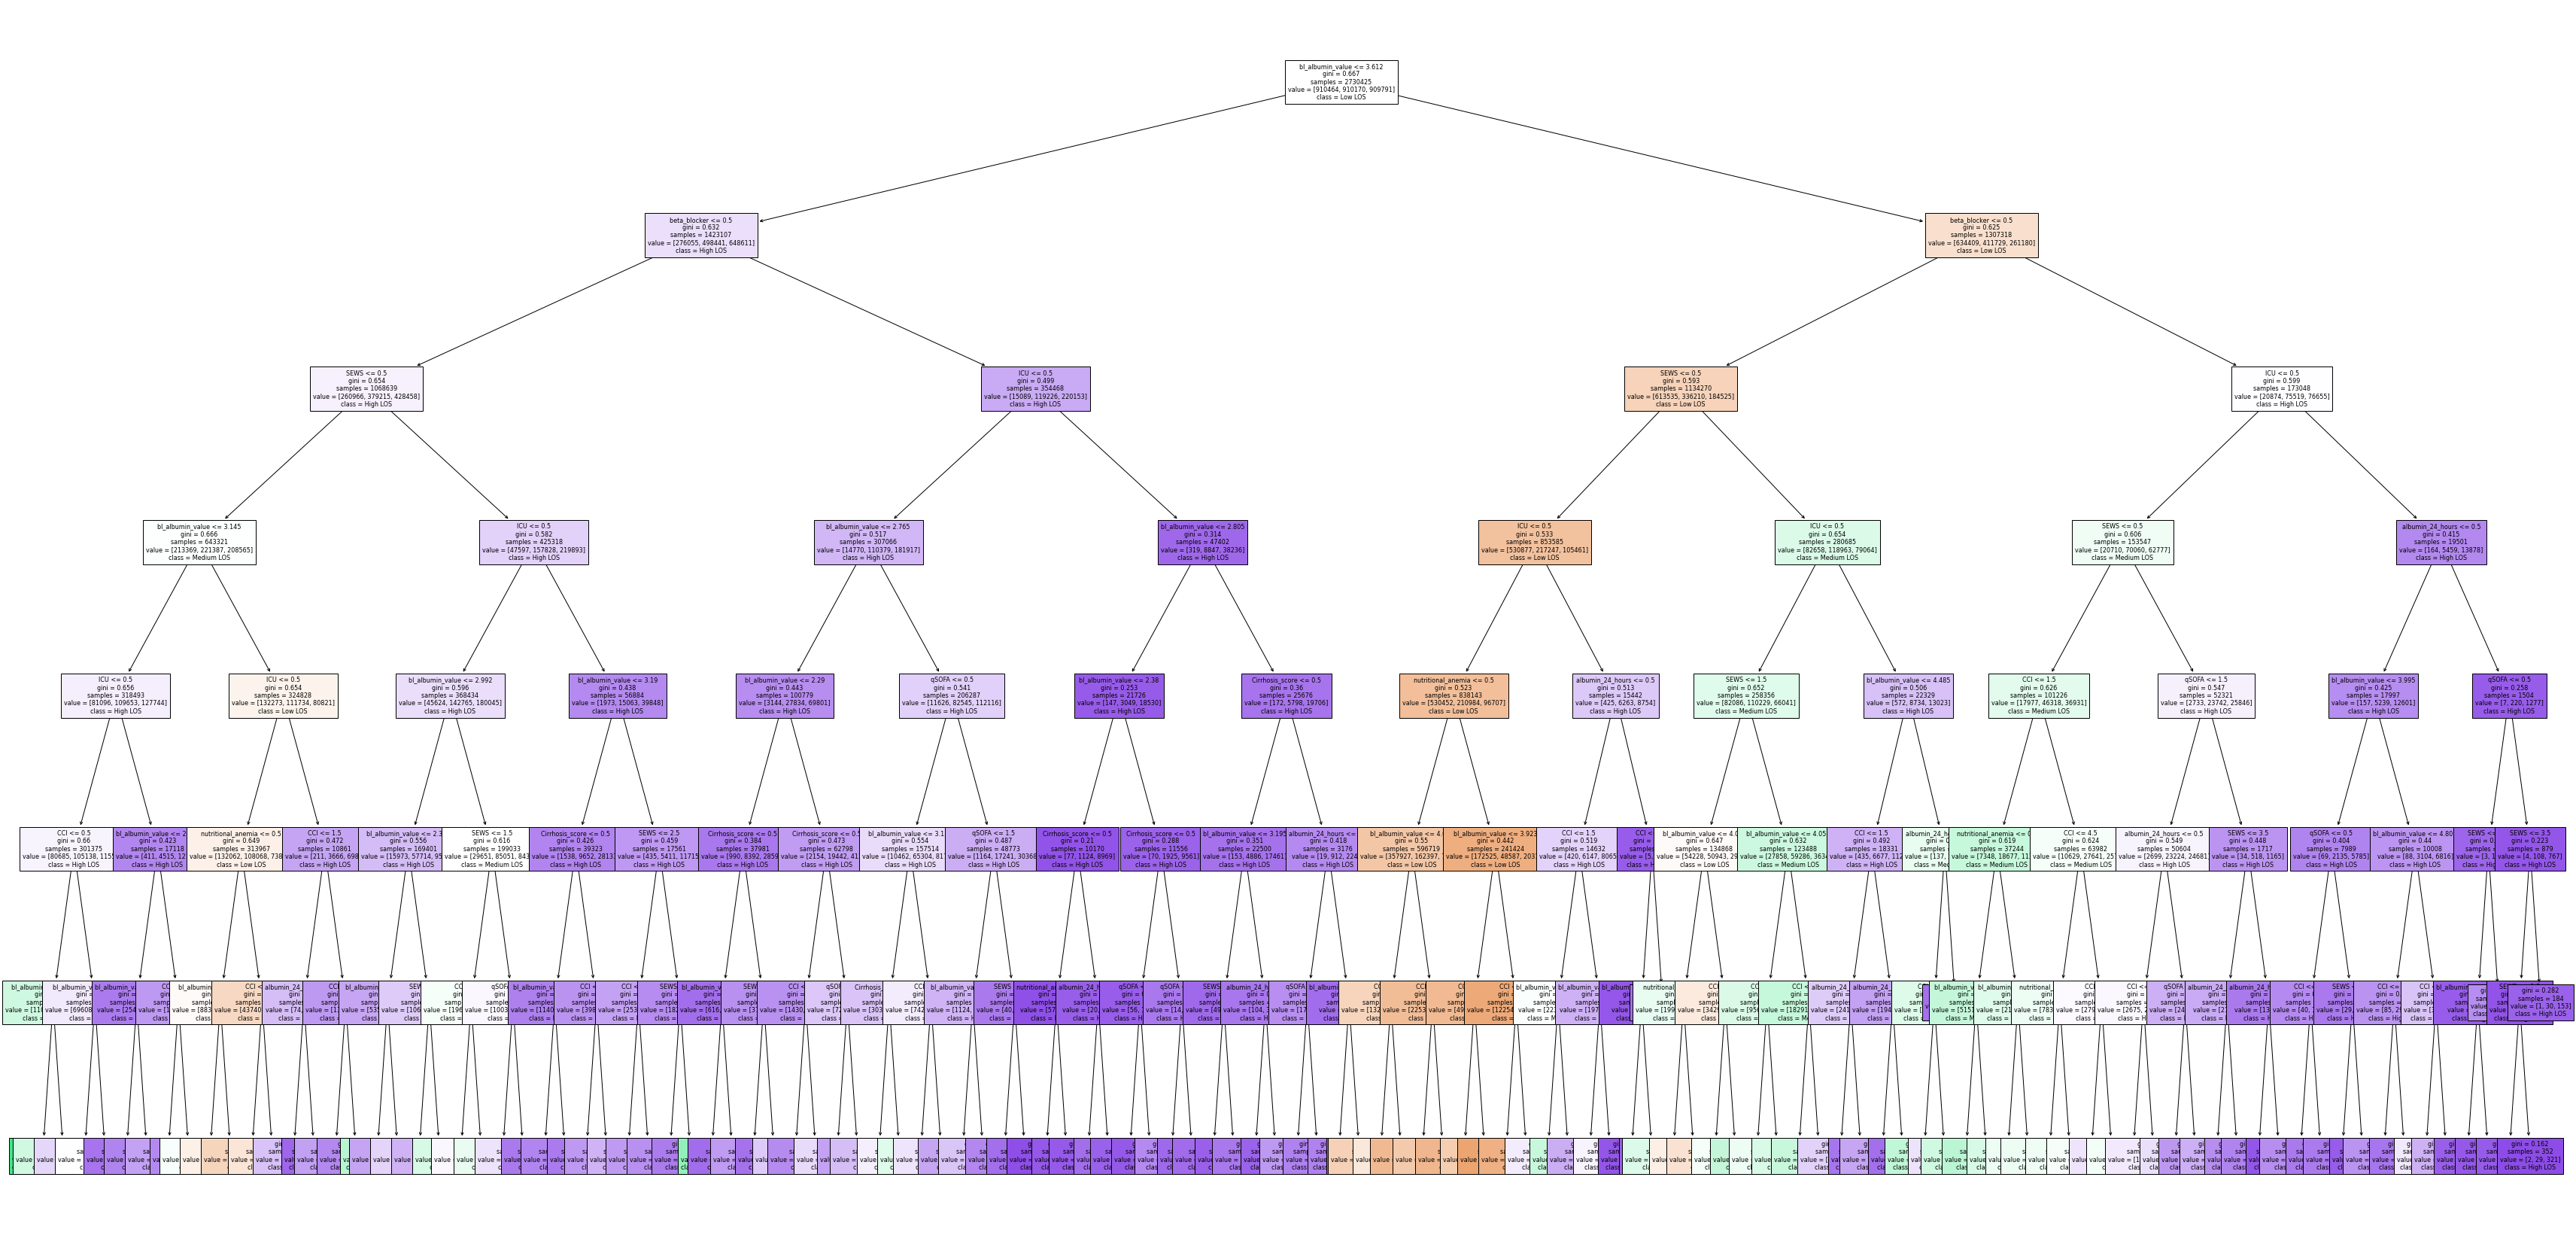

In [174]:
feature_names = X_train.columns.tolist()
class_names = ['Low LOS', 'Medium LOS', 'High LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [153]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D7_NCBL.png')

True

## 5: Decision Tree 

In [175]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=100)

Feature: albumin_24_hours Score: 0.00592
Feature: ICU Score: 0.09369
Feature: CCI Score: 0.02525
Feature: bl_albumin_value Score: 0.42372
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.00550
Feature: beta_blocker Score: 0.21629
Feature: Cirrhosis_score Score: 0.00221
Feature: nutritional_anemia Score: 0.02161
Feature: SEWS Score: 0.20580


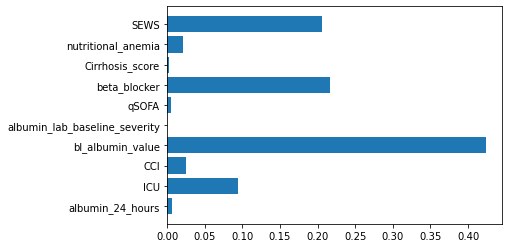

In [176]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [177]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [178]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[693836 108258 108370]
 [331881 234720 343569]
 [179613 162672 567506]]


In [179]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66    910464
           1       0.46      0.26      0.33    910170
           2       0.56      0.62      0.59    909791

    accuracy                           0.55   2730425
   macro avg       0.53      0.55      0.53   2730425
weighted avg       0.53      0.55      0.53   2730425



In [180]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[173491  26958  26823]
 [ 83300  58319  85893]
 [ 44815  41022 141986]]


In [181]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66    227272
           1       0.46      0.26      0.33    227512
           2       0.56      0.62      0.59    227823

    accuracy                           0.55    682607
   macro avg       0.53      0.55      0.52    682607
weighted avg       0.53      0.55      0.52    682607



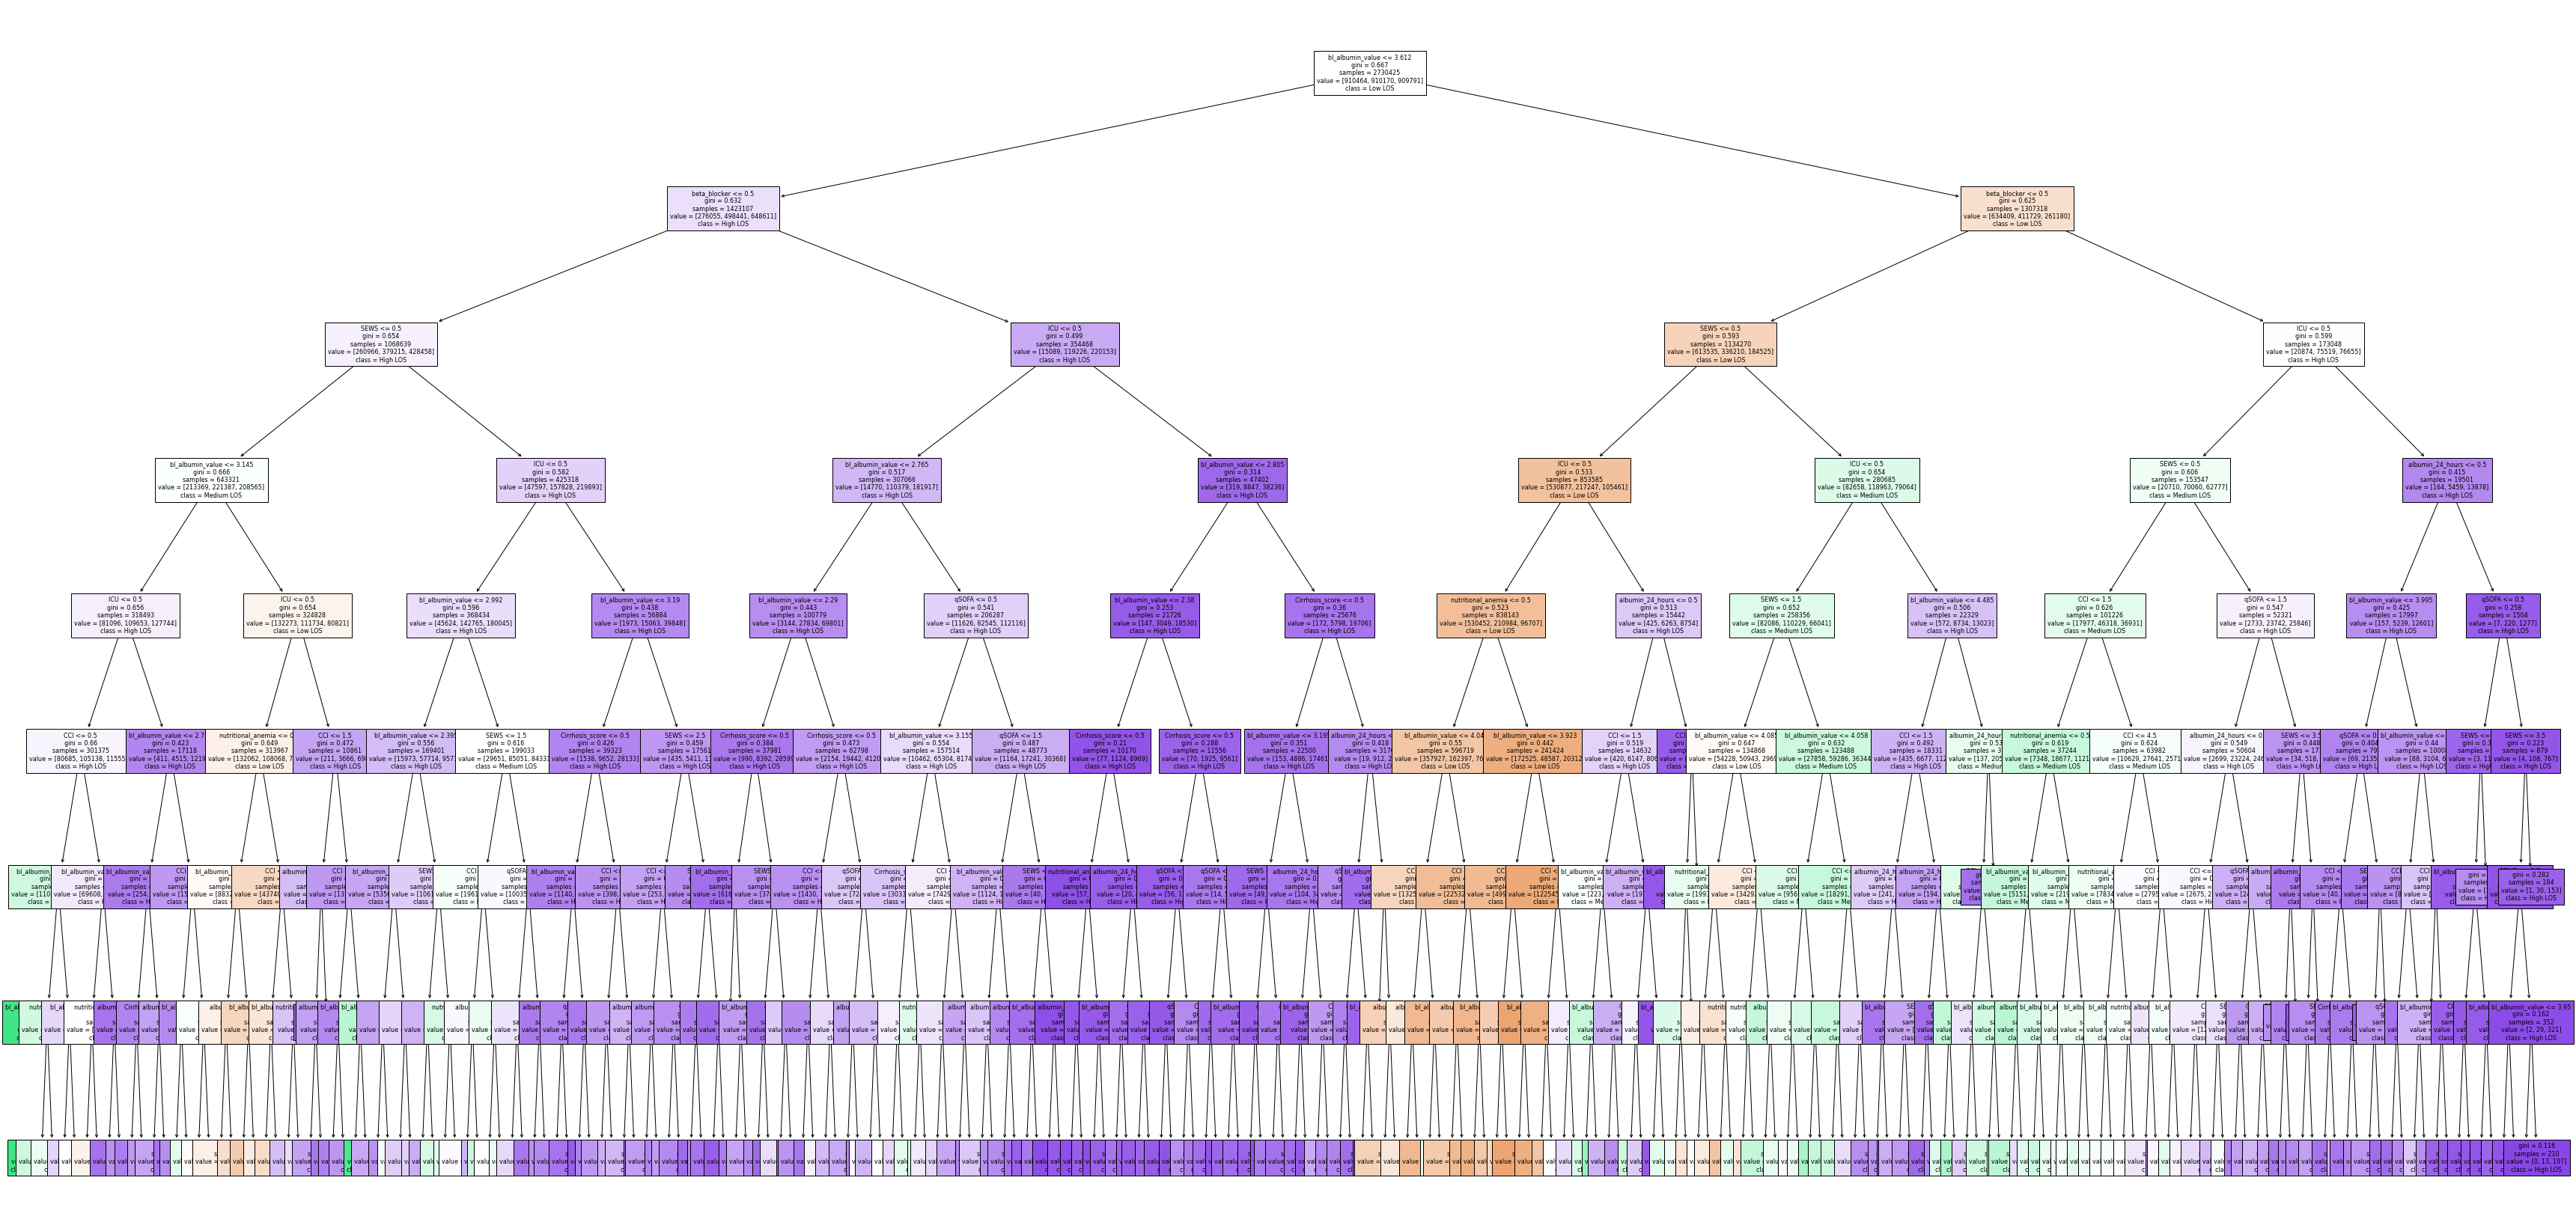

In [182]:
feature_names = X_train.columns.tolist()
class_names = ['Low LOS', 'Medium LOS', 'High LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [183]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D8_3M_UNMATCHED.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.622343 to fit



True

## Random Forest

In [53]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [54]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [55]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[ 42478   6691  29106]
 [ 27499   9425  54026]
 [ 19704   6073 109965]]


In [56]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.47      0.54      0.51     78275
           1       0.42      0.10      0.17     90950
           2       0.57      0.81      0.67    135742

    accuracy                           0.53    304967
   macro avg       0.49      0.49      0.45    304967
weighted avg       0.50      0.53      0.48    304967



In [57]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[10737  1690  7277]
 [ 6864  2400 13411]
 [ 4863  1550 27450]]


In [58]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.48      0.54      0.51     19704
           1       0.43      0.11      0.17     22675
           2       0.57      0.81      0.67     33863

    accuracy                           0.53     76242
   macro avg       0.49      0.49      0.45     76242
weighted avg       0.50      0.53      0.48     76242



Feature: albumin_24hrs Score: 0.68268
Feature: ICU Score: 0.09195
Feature: CCI Score: 0.04476
Feature: qSOFA Score: 0.05184
Feature: beta_blocker Score: 0.05392
Feature: Cirrhosis_score Score: 0.02860
Feature: nutritional_anemia Score: 0.00242
Feature: SEWS Score: 0.04383


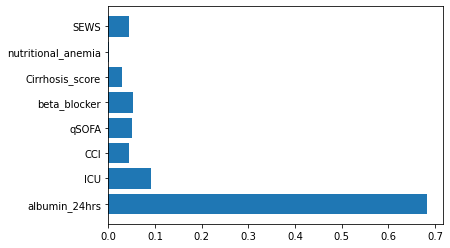

In [59]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()